# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

The 'medv' variable is median value of owner-occupied homes in $ 1000s, and 'dis' variable is weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?

The concept that defines the plotted line is linear regression. The line will represent the best-fit linear relationship between 'dis' (independent variable) and 'medv' (dependent variable).

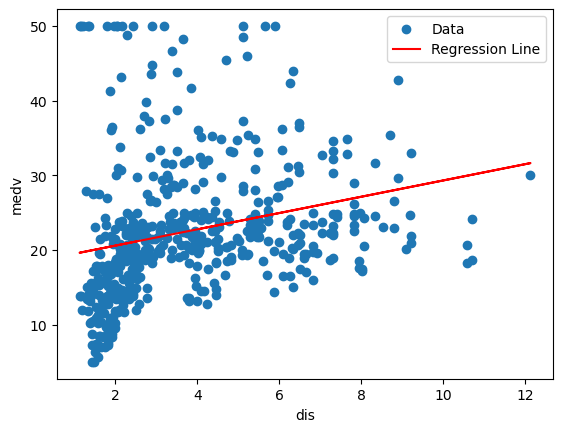

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

In the context of Boston dataset the null hypothesis states that there is no effect of the distance to employment centers on the median value of homes.
The alternative hypothesis suggests that there is a significant linear relationship between the independent and dependent variables.
Null hypothesis (H0): B1 = 0 (There is no effect of 'dis' on 'medv').
Alternative hypothesis (H1): B1 is not equal to 0 (There is an effect of 'dis' on 'medv').


_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [4]:
# Add your code here
# Add a constant term to the predictor variable
dis_with_const = sm.add_constant(dis)
# Fit the regression model
model = sm.OLS(medv, dis_with_const)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        21:51:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  

Coefficient estimate for B0 = 18.3901, and coefficient estimate for B1 = 1.0916.

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

The standard error for B0 = 0.817, and standard error for B1 = 0.188.

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

The confidence intervals for B0 is [16.784, 19.996], and confidence interval for B1 is [0.722, 1.462].


In [ ]:
# Your answer here
# (v) Coefficient estimate for B0 = 18.3901, and coefficient estimate for B1 = 1.0916.
# (vi) The standard error for B0 = 0.817, and standard error for B1 = 0.188.
# (vii) The confidence intervals for B0 is [16.784, 19.996], and confidence interval for B1 is [0.722, 1.462].


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)

In the output, the R-squared value is 0.062, meaning that approximately 6.2% of the variance in the dependent variable (median value of owner-occupied homes) is explained by the independent variable (weighted distances to employment centers) in the model, and suggests that the model explains only a small portion of the variance in the dependent variable and may not be considered a very good fit.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [ ]:
# Your answer here
# (viii) In the output, the R-squared value is 0.062, meaning that approximately 6.2% of the variance in the dependent variable (median value of owner-occupied homes) is explained 
# by the independent variable (weighted distances to employment centers) in the model, and suggests that the model explains only a small portion of the variance in the dependent
# variable and may not be considered a very good fit.

# (ix) To determine if we reject the implied null hypothesis (which assumes that the coefficient of the independent variable is zero), we look at the F-statistic and its associated p-value.
# F-statistic is 33.58, and the associated p-value is very small (1.21e-08), which indicates that the overall regression model is statistically significant. 
# Because the p-value is below the typical significance level (like 0.05), we reject the null hypothesis. This means that at least one independent variable in the model has a nonzero coefficient. 
# This implies that the distance to employment centers has a statistically significant effect on the median value of the owner-occupied homes, even though the effect size is small.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [5]:
# Add your code here
# Add a constant term to the predictor variables 'dis and 'rm'
predictors_with_const = sm.add_constant(Boston[['dis', 'rm']])
# Fit the multiple linear regression model
model = sm.OLS(Boston['medv'], predictors_with_const)
result = model.fit()
# Print the summary of the regression results
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        23:34:12   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

Null hypothesis (H0): There is no relationship between the independent variables (weighted distances to employment centers and average number of rooms per dwelling) and the dependent variable (median value of the owner-occupied homes). The null hypothesis suggests that the coefficients of both independent variables are zero, therefore they do not have any effect on the dependent variable.
H0: B1 = B2 = 0

Alternative hypothesis (H1): There is a relationship between at least one of the independent variables (dis and rm), and the dependent variable (median value of owner-occupied homes). The alternative hypothesis suggests that at least one of the coefficients of the independent variables is not zero and therfore there is significant effect on the dependent variable.
H1: At least one of these two, B1 or B2 is not equal to zero.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

From the model output, we can see that both coefficients are nonzero. The coefficient for 'dis' is 0.4888, and the coefficient for 'rm' is 8.8014. 
Second, we can check P values, p-value associated with 'dis' is 0.001 and p-value associated with 'rm' is 0.000, both are very small.
Small p-values indicate that the coefficients are statistically significant, suggesting that both 'dis' and 'rm' are likely to have a significant effect on 'medv'.
Third, we can check overall model significance. The F-statistic is 247.0, with a very small p-value of 1.84e-75, indicating that overall regression model is statistically significant, suggesting that at least one of the independent variables (dis and rm) has a significant effect on the dependent variable of medv.
Based on these observations, it seems that both 'dis' and 'rm' are predictive of 'medv'. The nonzero coefficents, small p-values, and overall significance of the model suggest that both independent variables are important predictors of the median value of the owner-occupied homes.


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

My answer: Outliers are data points that deviate significantly from the overall pattern of the data, and they represent observations for which the model makes large errors in prediction. Outliers can affect the precision of the model's prediction, lead to biased estimates, and they may affect fit of the model and validity of the statistical inferences drawn from the model.

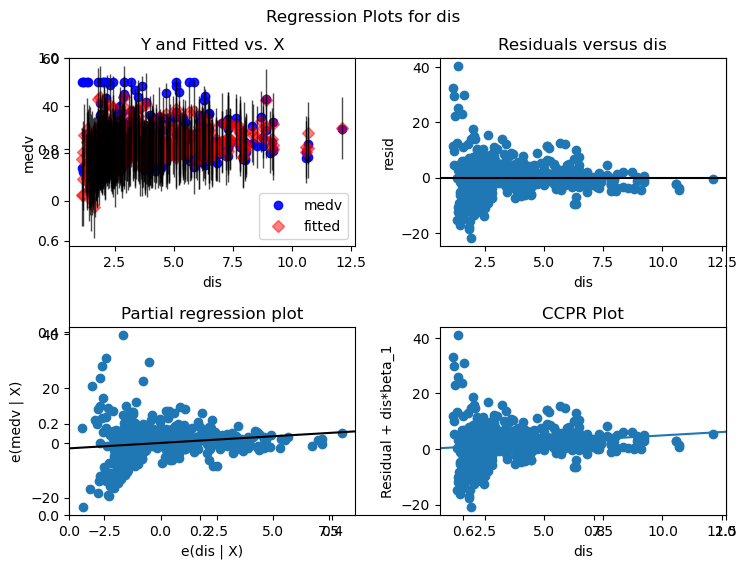

In [6]:
# Add your code here
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_regress_exog(result, 'dis', fig=fig)
plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [7]:
# Add your code here
# Create the interaction term
Boston['dis_rm_interaction'] = Boston['dis'] * Boston['rm']

# Fit the second model with the interaction term
model_interaction = sm.OLS(Boston['medv'], sm.add_constant(Boston[['dis', 'rm', 'dis_rm_interaction']]))
result_interaction = model_interaction.fit()

# Print the summary of the regression results
print(result_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        01:03:12   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2533      4

My answer: 
The coefficient for the interaction term 'dis_rm_interaction' is 0.9855, with a very small p value (0.000), indicating that interaction term is statistically significant. The significant interaction term suggests that the relationship between 'dis' and 'medv' depends on the number of rooms per dwelling 'rm'. Considering the negative coefficient of 'dis', and positive coefficient of 'rm' and 'dis_rm_interactio', one possible interpretation could be that the effect of distance to employment centers on home values might be greater in areas with fewer rooms compared to areas with more rooms.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
